In [1]:
!pip install numpy
!pip install mat73
!pip install matplotlib

In [2]:
import numpy as np
import mat73
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filepath = '../data/mnist.mat'
data = mat73.loadmat(filepath)

In [4]:
X = data['digits_train'].astype(np.float32)
y = data['labels_train']
X = X.reshape(28*28,60000)

In [5]:
def classifier(digit):
    arr = []
    count=0
    for i in range(60000):
        if y[i] == digit:
            arr.append(np.array(X[:,i]))
            count +=1
    arr = np.array(arr)
    arr = arr.transpose()
    return arr

In [6]:
digits = []
for i in range(10):
    digits.append(classifier(i))

In [7]:
means = []
digits_centralized = []
for digit in digits:
    mean = digit.mean(axis=1)
    means.append(mean)
    digit_centralized = digit.copy()
    for i in range(digit.shape[0]):
        digit_centralized[i,:] = digit_centralized[i,:] - mean[i]
    digits_centralized.append(digit_centralized)

In [8]:
def computeCoordinates(digit):
    cov_matrix = np.cov(digit_centralized)
    
    eVals, eVectors = np.linalg.eigh(cov_matrix)
    eVals = np.flip(eVals)
    eVectors = np.flip(eVectors, axis=1)
    
    X_reduced = eVectors[:,:84]
    X_reduced_transpose = X_reduced.transpose()
    reduced_digit = np.matmul(X_reduced_transpose, digit)
    return reduced_digit, X_reduced

In [9]:
def regenerateImage(reduced_digit, digit_centralized, X_reduced, mean):
    regenerated_digit = np.matmul(X_reduced.transpose(),digit_centralized)
    regenerated_digit = np.matmul(X_reduced,regenerated_digit)
    
    for i in range(regenerated_digit.shape[0]):
        regenerated_digit[i,:] = regenerated_digit[i,:] + mean[i]
    
    return regenerated_digit

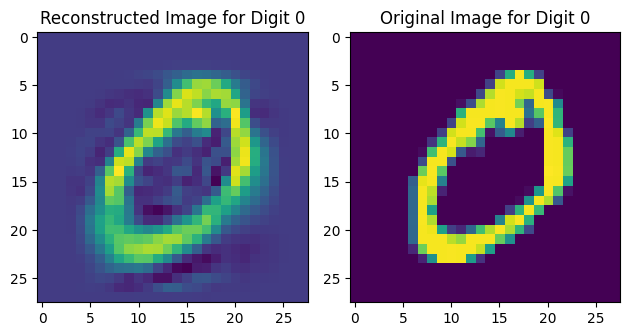

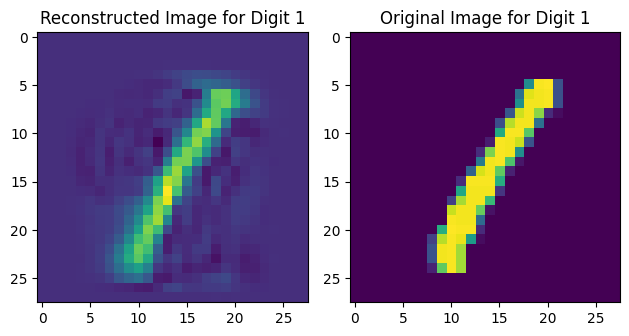

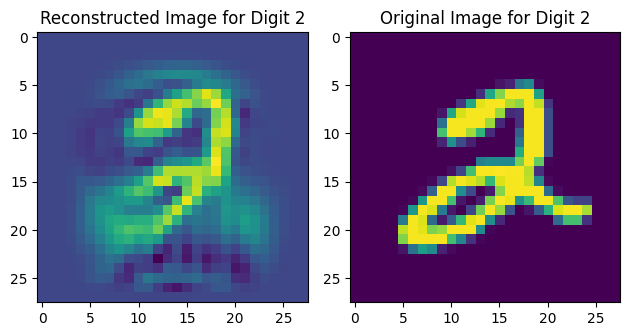

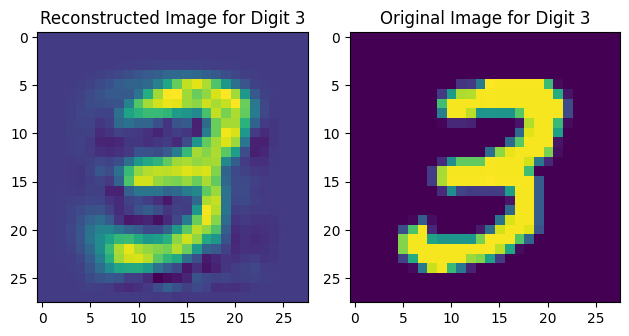

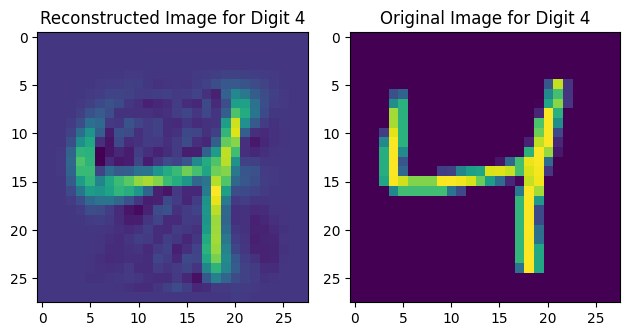

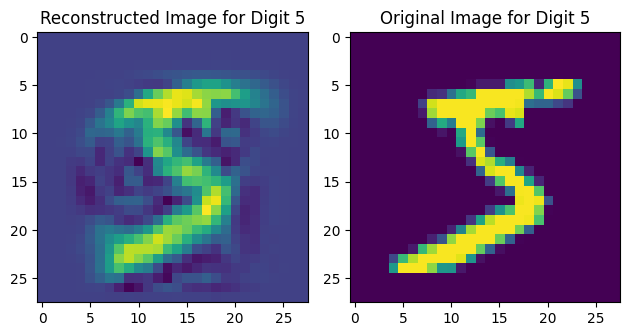

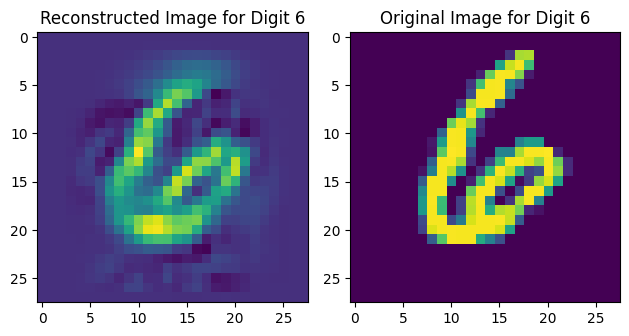

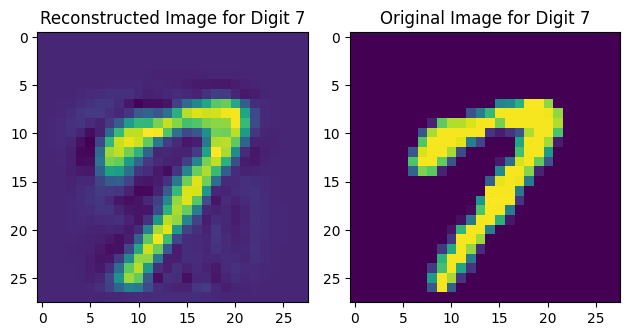

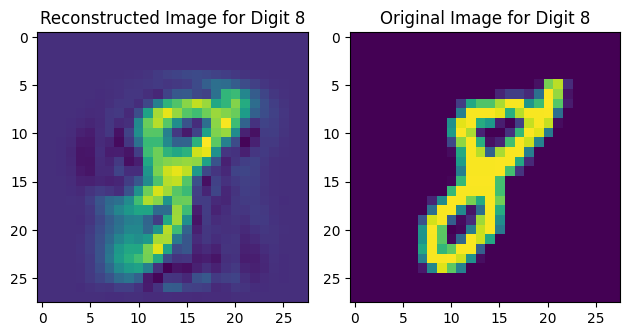

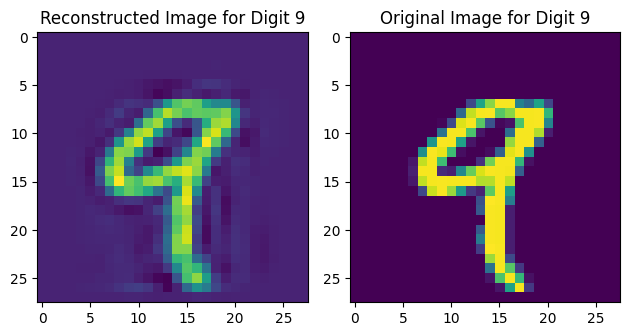

In [13]:
for i in range(len(digits_centralized)):
    reduced_digit, X_reduced = computeCoordinates(digits_centralized[i])
    regenerated_digit = regenerateImage(reduced_digit,digits_centralized[i],X_reduced, means[i])
    
    plt.subplot(1,2,1)
    plt.title(f"Reconstructed Image for Digit {i}")
    plt.imshow(regenerated_digit[:,0].reshape(28,28))
    plt.subplot(1,2,2)
    plt.title(f"Original Image for Digit {i}")
    plt.imshow(digits[i][:,0].reshape(28,28))
    plt.tight_layout()
    plt.show()